<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Heatmaps</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            <p>@bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

%matplotlib inline

## Johns Hopkins University Dataset

The JHU CoVID dataset has steadly become the unofficial standard dataset for the number of cases and deaths aroudn the world. You can download the continuously updated data from their [github repository](https://github.com/CSSEGISandData/COVID-19/):

In [2]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

The repository contains 4 time series files:

- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_confirmed_US.csv
- time_series_covid19_deaths_US.csv

correponding to confirmed cases and number of deaths globally by country and for the US by state.

These curated files result from an aggregation and standardization of several dozen national health authority reports and have become the go-to 

## Global data

We start by looking at the totals for confirmed cases and deaths around the world

In [3]:
confirmed = pd.read_csv(url + 'time_series_covid19_confirmed_global.csv')

The dataset include not only the number of total cases (or deaths) by country for eah day, but also state and province level information (in some cases), as well as Latitude and Longitude data:

We can obtain the country totals by aggregating over all the regions. The easiest way to do this is to remove the extraneous columns and sum by column

In [4]:
del_columns = [
 'Province/State',
 'Lat',
 'Long',
]

For convenience, we also transpose the data so that each row corresponds to a specific date. This will make it easier to select specific countries for plotting

In [5]:
confirmed_timeline = confirmed.drop(columns=del_columns).groupby('Country/Region').sum().T
confirmed_timeline.index = pd.to_datetime(confirmed_timeline.index)

### Peak times

The number of cases can vary significantly from country to country, making it harder to compare countries using time series as we've seen above. One way around it is to use a heatmap on the daily number of cases normalized by the peak value. For clarity, we start by subsetting just the countries with more than 100,000 cases

In [6]:
selected_countries = confirmed_timeline.T[confirmed_timeline.max(axis=0)>100000].index

And normalize it by the peak value

In [7]:
peaks = confirmed_timeline[selected_countries].diff(1).rolling(7).mean().T.apply(lambda x:x/x.max(), axis=1)

And sort the countries by the peak date

In [8]:
sorted_countries = confirmed_timeline.iloc[-1].sort_values(ascending=False).iloc[:50].index

EDIT: Truncating at 50 countries for readability

In [9]:
len(sorted_countries)

50

And finally, we make the heat map with all the countries in order

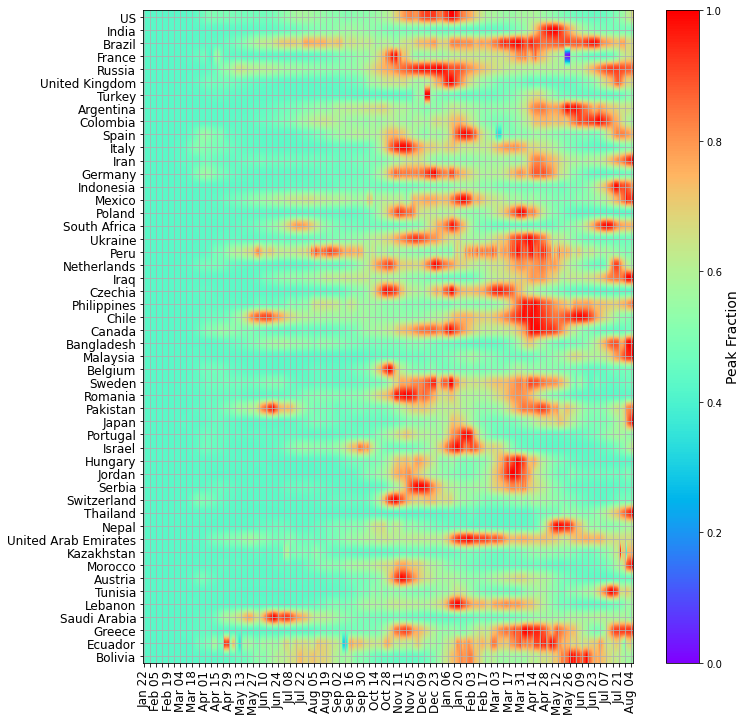

In [10]:
fig, ax = plt.subplots(1, figsize=(12,12))

norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Peak Fraction', fontsize=14)

ax.imshow(peaks.loc[sorted_countries].fillna(0).values, cmap=plt.cm.rainbow)
ax.set_xticks(np.arange(0, peaks.shape[1], 7))
ax.set_xticklabels([day.strftime("%b %d") if i%2 == 0  else '' 
                    for i, day in enumerate(peaks.columns[::7]) ], 
                   fontsize=12, rotation=90)
ax.set_yticks(np.arange(0, len(sorted_countries)))
ax.set_yticklabels(sorted_countries, fontsize=12)
ax.set_aspect(15)
ax.grid()
fig.patch.set_facecolor('#FFFFFF')

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>